# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [53]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)


594

In [54]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [55]:
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=a69757a86293d09e93066f2c67bb69cc&units=metric&q=


In [56]:
response=requests.get(query_url+"new york")

In [57]:
json=response.json()
print(json)

{'coord': {'lon': -73.99, 'lat': 40.73}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 4.88, 'pressure': 1019, 'humidity': 54, 'temp_min': 2.2, 'temp_max': 5.6}, 'visibility': 16093, 'wind': {'speed': 1.69, 'deg': 208}, 'clouds': {'all': 1}, 'dt': 1545606900, 'sys': {'type': 1, 'id': 4686, 'message': 0.0086, 'country': 'US', 'sunrise': 1545567475, 'sunset': 1545600799}, 'id': 5128581, 'name': 'New York', 'cod': 200}


In [58]:
temp=json["main"]["temp"]
temp1=json["main"]["humidity"]
temp3=json['wind']["speed"]
temp4=json["clouds"]["all"]

In [59]:
json.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'id', 'name', 'cod'])

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [81]:
# appending data in the data list for all the cities in json file 
data=[]
i=0
for city in cities[:575]:
    
#    print(city)
    json = requests.get(query_url + city).json()
    
    i=i+1
    try:
        tempmax=json["main"]['temp_max']
        humidity=json["main"]["humidity"]
        speed=json['wind']["speed"]
        cloudiness=json["clouds"]["all"]
        lat=json["coord"]["lat"]
        country=json['sys']["country"]
        date=json['dt']
        lon=json["coord"]["lon"]
        data.append([city,cloudiness,country,date,humidity,lat,lon,tempmax,speed])
#        data.append([city,temp,temp1,temp2,temp3,temp6,temp4,temp5,temp7])
        print(f"counter {i} || {city}")
        time.sleep(.1)
    except:
        print("city not found")

    

city not found
counter 2 || agadez
counter 3 || san quintin
counter 4 || mataura
counter 5 || mizan teferi
counter 6 || qaanaaq
counter 7 || snizhne
counter 8 || beloha
counter 9 || maldonado
counter 10 || marzuq
counter 11 || kikwit
counter 12 || castro
counter 13 || kodiak
counter 14 || luderitz
counter 15 || puerto escondido
city not found
counter 17 || airai
counter 18 || albany
city not found
counter 20 || nanortalik
counter 21 || camabatela
counter 22 || barrow
counter 23 || vanimo
counter 24 || batticaloa
counter 25 || tasiilaq
counter 26 || iberia
counter 27 || manadhoo
counter 28 || vaini
counter 29 || lagos
counter 30 || ancud
counter 31 || sitka
counter 32 || puerto ayora
counter 33 || new norfolk
counter 34 || casablanca
counter 35 || rikitea
counter 36 || bomet
counter 37 || punta arenas
counter 38 || valparaiso
counter 39 || ushuaia
city not found
counter 41 || viedma
counter 42 || kalengwa
counter 43 || atuona
counter 44 || san policarpo
counter 45 || quatre cocos
counte

counter 354 || tagbac
counter 355 || nome
counter 356 || saint-joseph
counter 357 || luis correia
counter 358 || touros
counter 359 || saint-pierre
counter 360 || kingaroy
city not found
counter 362 || santa rosa
counter 363 || padang
counter 364 || caudry
counter 365 || mandalgovi
counter 366 || college
counter 367 || kawalu
counter 368 || aviles
counter 369 || isabela
city not found
counter 371 || bambous virieux
counter 372 || kanniyakumari
counter 373 || bathsheba
counter 374 || barcelos
city not found
counter 376 || plettenberg bay
counter 377 || biltine
counter 378 || itoman
counter 379 || los llanos de aridane
counter 380 || bereda
counter 381 || honningsvag
counter 382 || esperance
counter 383 || obihiro
counter 384 || gombong
counter 385 || inyonga
counter 386 || clyde river
counter 387 || armidale
counter 388 || jishou
counter 389 || ashcroft
counter 390 || guanica
counter 391 || teya
counter 392 || north bend
counter 393 || berlevag
counter 394 || kidal
counter 395 || coripa

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [82]:
# Creating data frame 
data_df=pd.DataFrame(data,columns=["City","Cloudiness","Country", "Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])
data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,agadez,0,NE,1545614693,57,16.97,7.99,11.89,4.14
1,san quintin,100,PH,1545614693,74,17.54,120.52,24.14,1.94
2,mataura,0,NZ,1545614693,64,-46.19,168.86,20.21,2.01
3,mizan teferi,36,ET,1545614433,77,6.99,35.58,15.14,1.21
4,qaanaaq,68,GL,1545614433,91,77.48,-69.36,-20.44,3.09


In [83]:
#displaying how many cities data we go in Data Frame
data_df.count()

City          524
Cloudiness    524
Country       524
Date          524
Humidity      524
Lat           524
Lng           524
Max Temp      524
Wind Speed    524
dtype: int64

In [84]:
#getting current date 
date=time.strftime("%d/%m/%Y")
date

'23/12/2018'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5,0,'Latitude')

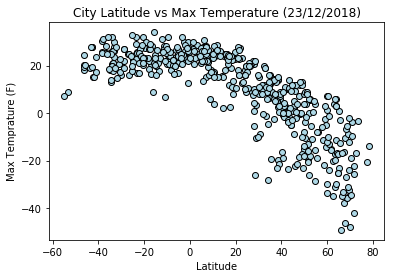

In [85]:
plt.scatter(data_df["Lat"],data_df["Max Temp"],c="lightblue",edgecolor='black')
plt.title(f"City Latitude vs Max Temperature ({date})")
plt.ylabel("Max Temprature (F)")
plt.xlabel("Latitude")

#### Latitude vs. Humidity Plot

Text(0,0.5,'Humidity %')

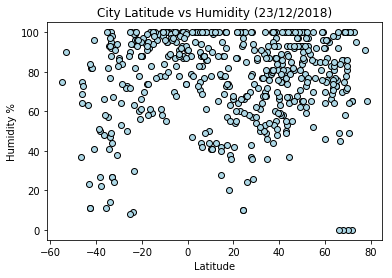

In [86]:
plt.scatter(data_df["Lat"],data_df["Humidity"],c="lightblue",edgecolor='black')
plt.title(f"City Latitude vs Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")


#### Latitude vs. Cloudiness Plot

Text(0,0.5,'Cloudiness %')

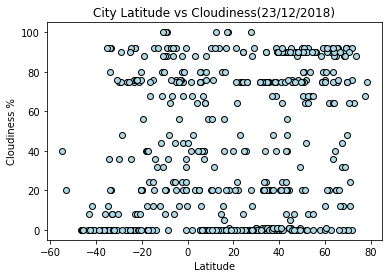

In [87]:
plt.scatter(data_df["Lat"],data_df["Cloudiness"],c="lightblue",edgecolor='black')
plt.title(f"City Latitude vs Cloudiness({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")


#### Latitude vs. Wind Speed Plot

Text(0,0.5,'Wind Speed(mph)')

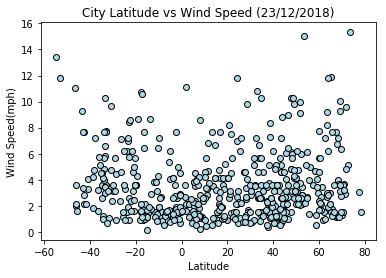

In [88]:
plt.scatter(data_df["Lat"],data_df["Wind Speed"],c="lightblue",edgecolor='black')
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")


OBSERVATIONS->
1: In my first observation summers in southern hemisphere are hotter than northen hemisphere .
    
2: Near the equater relative humidity tend to be high.
    
3: My observation for cloudiness is that it does not depend on latitude.
    
4: Very few cities have average wind speed of over 7 (mph) 
